In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

In [6]:
df= pd.read_csv("TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [7]:
missing_values= df.isnull().sum()
statistics= df.describe()
missing_values, statistics

(Date         0
 Open         0
 High         0
 Low          0
 Close        0
 Adj Close    0
 Volume       0
 dtype: int64,
               Open         High          Low        Close    Adj Close  \
 count  2956.000000  2956.000000  2956.000000  2956.000000  2956.000000   
 mean    138.691296   141.771603   135.425953   138.762183   138.762183   
 std     250.044839   255.863239   243.774157   250.123115   250.123115   
 min       3.228000     3.326000     2.996000     3.160000     3.160000   
 25%      19.627000    20.402000    19.127500    19.615000    19.615000   
 50%      46.656999    47.487001    45.820002    46.545000    46.545000   
 75%      68.057001    69.357500    66.911501    68.103998    68.103998   
 max    1234.410034  1243.489990  1217.000000  1229.910034  1229.910034   
 
              Volume  
 count  2.956000e+03  
 mean   3.131449e+07  
 std    2.798383e+07  
 min    5.925000e+05  
 25%    1.310288e+07  
 50%    2.488680e+07  
 75%    3.973875e+07  
 max    3.04

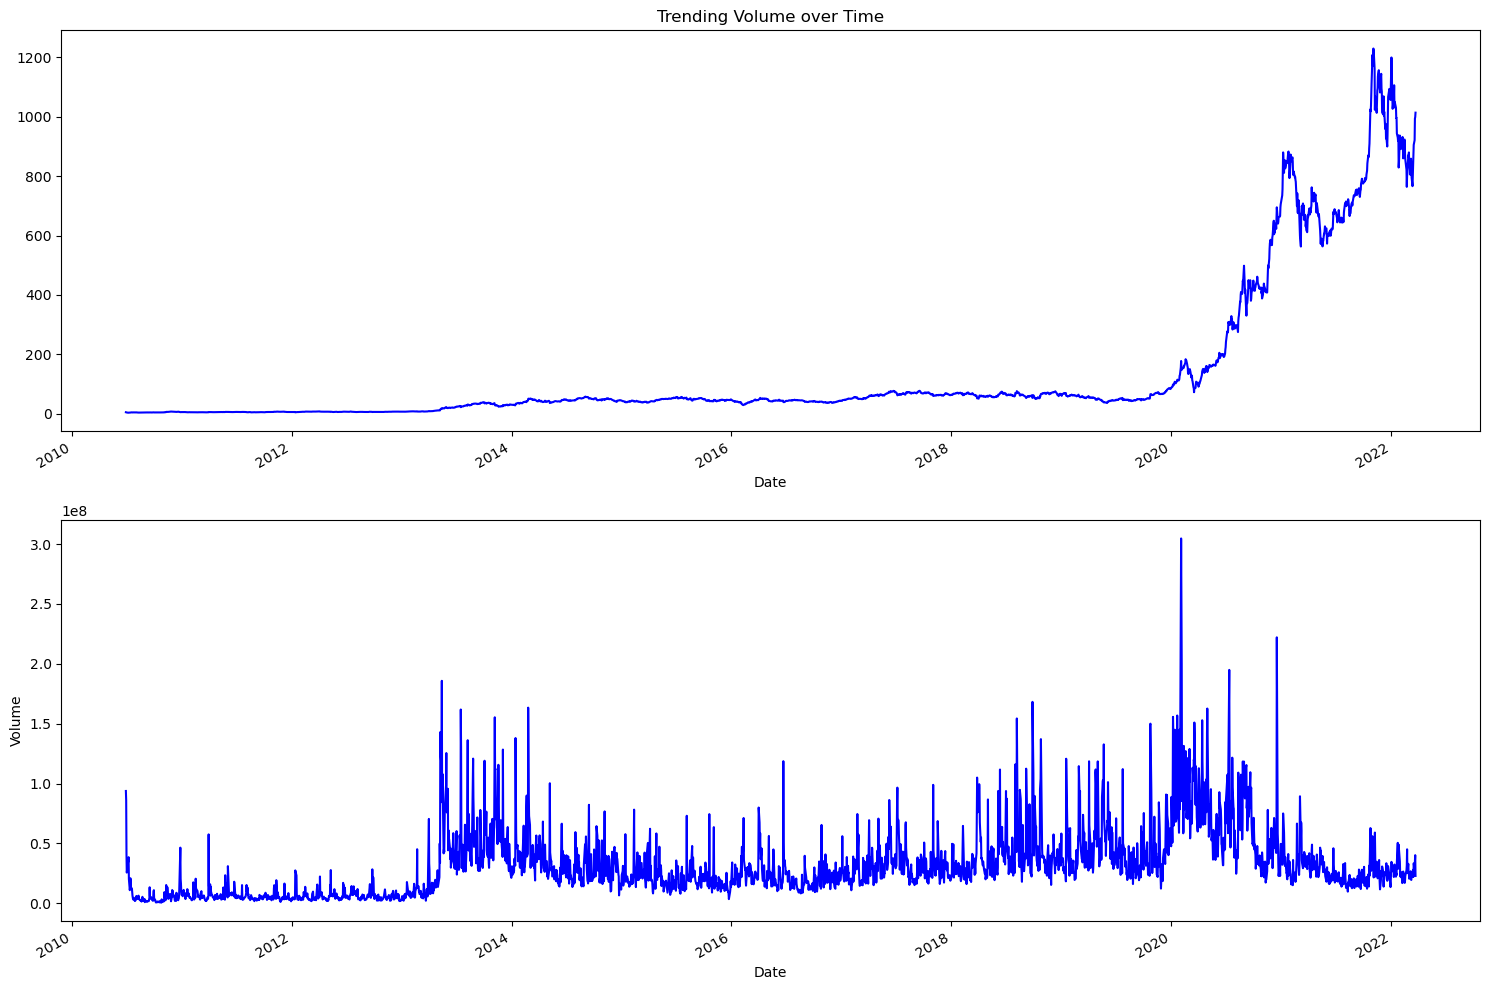

In [37]:
import matplotlib.pyplot as plt
df['Date']= pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)



fig, ax= plt.subplots(nrows=2, ncols=1, figsize=(15,10))

df['Close'].plot(ax=ax[0], color='blue')
ax[0].set_title('Closing Time over Time')
ax[1].set_ylabel('Price ($)')

df['Volume'].plot(ax=ax[1], color='blue')
ax[0].set_title('Trending Volume over Time')
ax[1].set_ylabel('Volume')
plt.tight_layout()
plt.show()



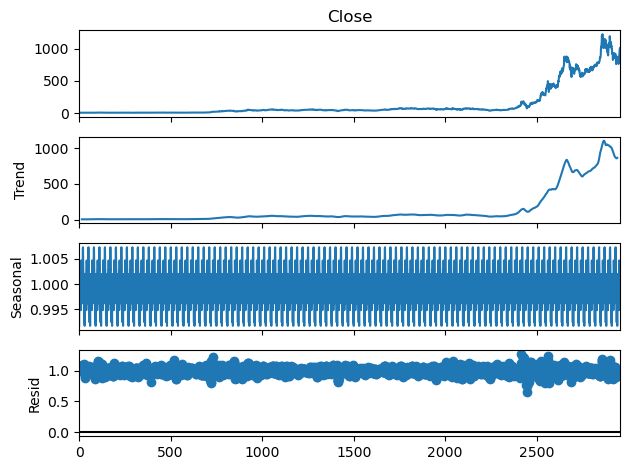

In [9]:
decomposition= seasonal_decompose(df['Close'], model='multiplicative', period=30)
fig = decomposition.plot()
plt.show()

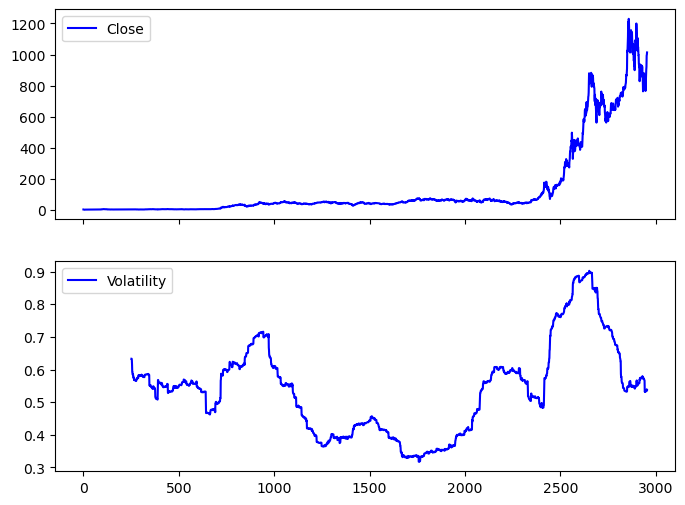

In [10]:
df['Return']= df['Close'].pct_change()
df['Volatility']= df['Return'].rolling(window=252).std()*np.sqrt(252)
df[['Close','Volatility']].plot(subplots=True, color='blue', figsize=(8,6))
plt.show()

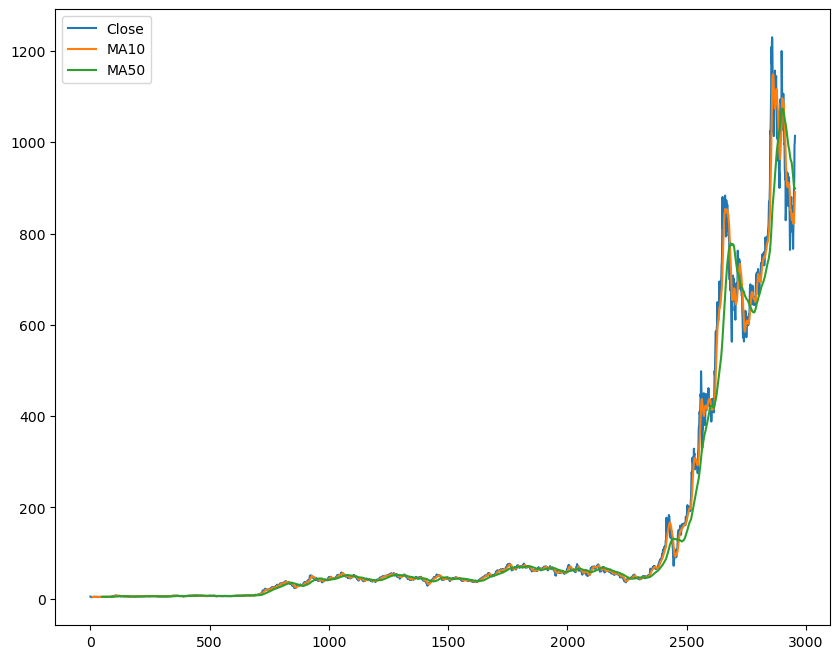

In [12]:
df['MA10']=df['Close'].rolling(window=10).mean()
df['MA50']=df['Close'].rolling(window=50).mean()
df[['Close','MA10','MA50']].plot(label='Tesla', figsize=(10,8))
plt.show()

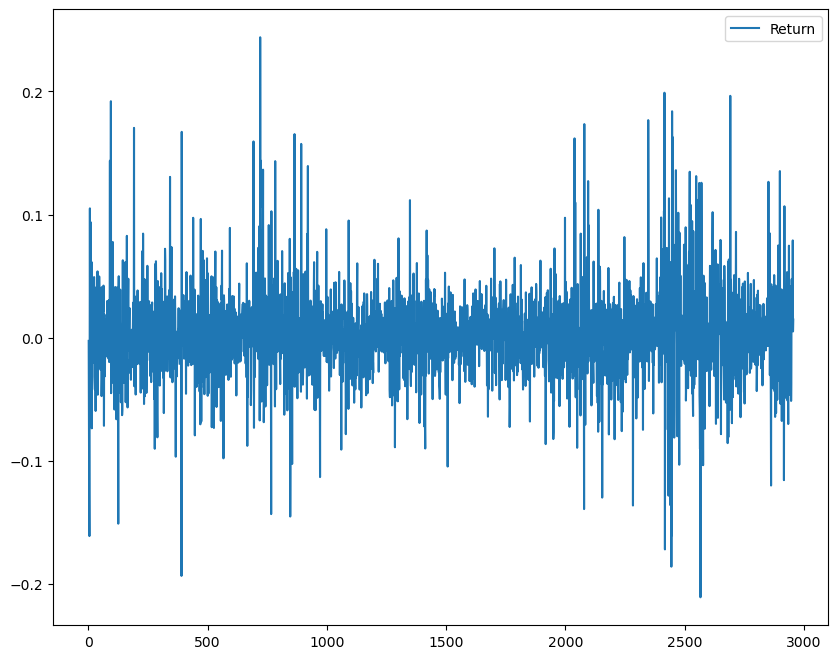

In [15]:
df['Return']=df['Close'].pct_change()
df[['Return']].plot(label='Return', figsize=(10,8))
plt.show()

In [17]:
prophet_df=df.reset_index()[['Date', 'Close']]
prophet_df.rename(columns={'Date': 'ds', 'Close':'y'}, inplace=True)
prophet_df.head()

,ds,y
0,2010-06-29,4.778
1,2010-06-30,4.766
2,2010-07-01,4.392
3,2010-07-02,3.840
4,2010-07-06,3.222


In [19]:
model= Prophet(daily_seasonality=True)

In [25]:
model.fit(prophet_df)
future= model.make_future_dataframe(periods=365)
forecast= model.predict(future)

07:10:50 - cmdstanpy - INFO - Chain [1] start processing
07:10:51 - cmdstanpy - INFO - Chain [1] done processing


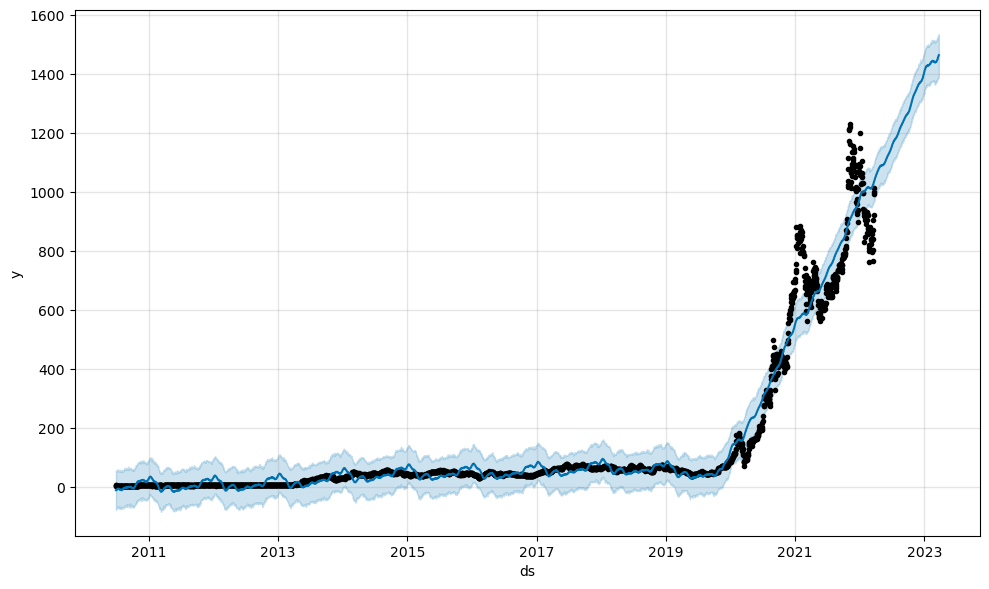

In [35]:
model.plot(forecast)
plt.show()

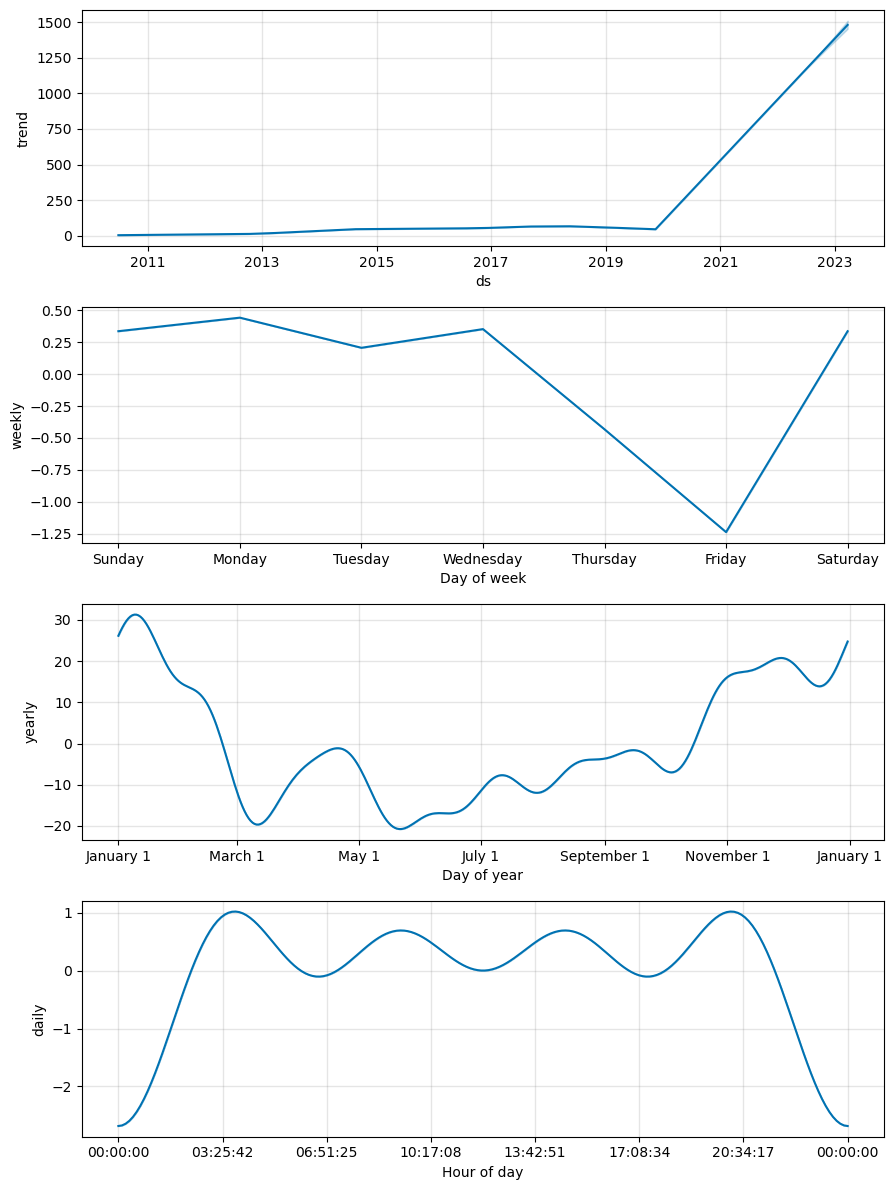

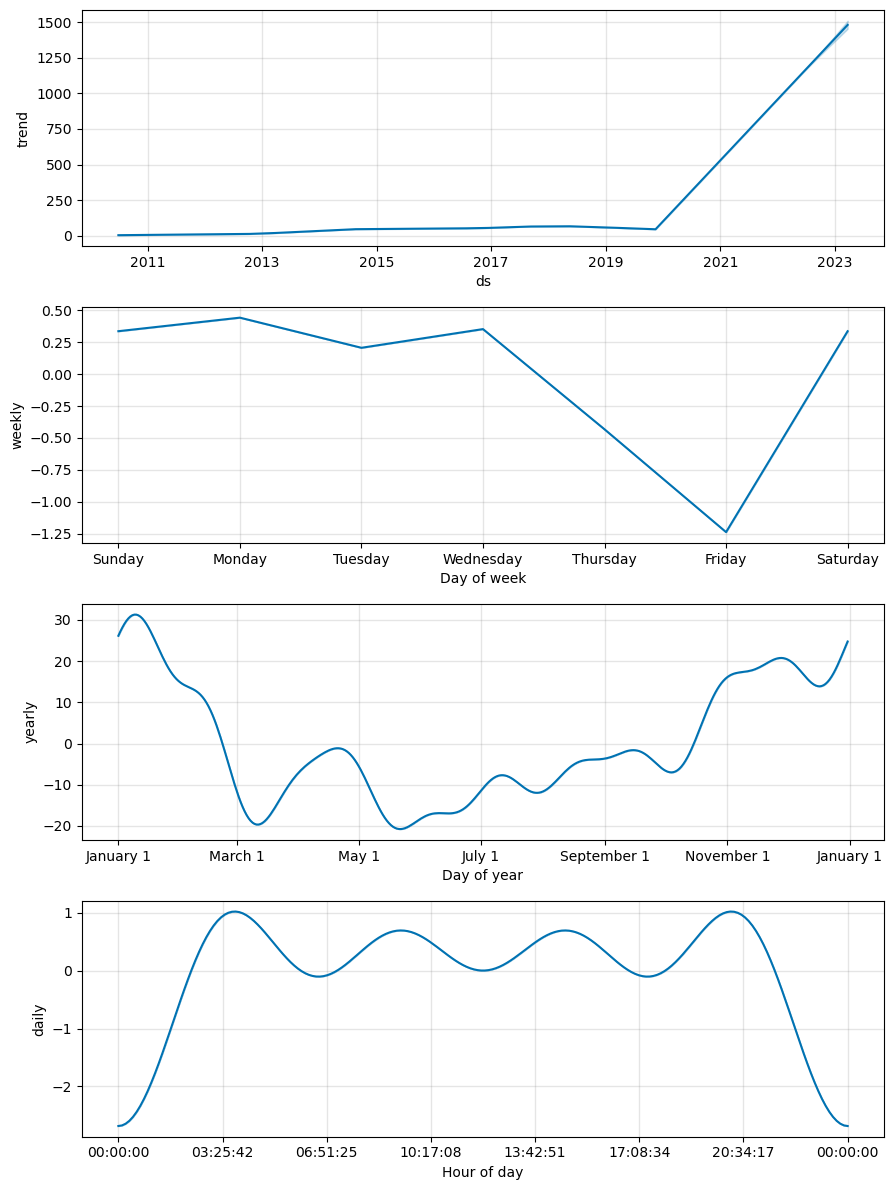

In [33]:
model.plot_components(forecast)